# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date              
from datetime import time              
from datetime import datetime         
from datetime import timedelta         
from pytz import timezone , datetime
import matplotlib.pyplot as plt
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load the data 

In [3]:
SolarPrediction=pd.read_csv("SolarPrediction.csv")

In [4]:
SolarPrediction

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


# Cleaning the data 

In [5]:

SolarPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [6]:
SolarPrediction['UNIXTime']= pd.to_datetime(SolarPrediction['UNIXTime'] , unit='s')



In [7]:
SolarPrediction['Radiation']= SolarPrediction['Radiation'].astype(float)

In [8]:
SolarPrediction['Temperature']=SolarPrediction['Temperature'].astype(float)


In [9]:
SolarPrediction['Pressure']= SolarPrediction['Pressure'].astype(float)


In [10]:
SolarPrediction['Humidity']=SolarPrediction['Humidity'].astype(float) 


In [11]:
SolarPrediction['WindDirection(Degrees)'] = SolarPrediction['WindDirection(Degrees)'].astype(float)


In [12]:
SolarPrediction['Speed']= SolarPrediction['Speed'].astype(float)


In [13]:
SolarPrediction['TimeSunSet']= pd.to_datetime(SolarPrediction['TimeSunSet'],format='%H:%M:%S')


In [14]:
SolarPrediction['TimeSunRise']= pd.to_datetime(SolarPrediction['TimeSunRise'],format='%H:%M:%S')


In [15]:
SolarPrediction.drop_duplicates()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-30 09:55:26,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00
1,2016-09-30 09:50:23,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
2,2016-09-30 09:45:26,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
3,2016-09-30 09:40:21,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
4,2016-09-30 09:35:24,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01 10:20:04,12/1/2016 12:00:00 AM,00:20:04,1.22,44.0,30.43,102.0,145.42,6.75,1900-01-01 06:41:00,1900-01-01 17:42:00
32682,2016-12-01 10:15:01,12/1/2016 12:00:00 AM,00:15:01,1.17,44.0,30.42,102.0,117.78,6.75,1900-01-01 06:41:00,1900-01-01 17:42:00
32683,2016-12-01 10:10:01,12/1/2016 12:00:00 AM,00:10:01,1.20,44.0,30.42,102.0,145.19,9.00,1900-01-01 06:41:00,1900-01-01 17:42:00
32684,2016-12-01 10:05:02,12/1/2016 12:00:00 AM,00:05:02,1.23,44.0,30.42,101.0,164.19,7.87,1900-01-01 06:41:00,1900-01-01 17:42:00


In [16]:
SolarPrediction.describe()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
count,32686,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686,32686
mean,2016-11-02 00:41:04.944808192,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,1900-01-01 06:27:38.431132416,1900-01-01 17:58:11.463623680
min,2016-09-01 10:00:08,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,1900-01-01 06:07:00,1900-01-01 17:42:00
25%,2016-10-04 02:01:37.500000,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,1900-01-01 06:14:00,1900-01-01 17:45:00
50%,2016-11-01 18:47:49.500000,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,1900-01-01 06:24:00,1900-01-01 17:51:00
75%,2016-11-30 04:28:48,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,1900-01-01 06:40:00,1900-01-01 18:09:00
max,2017-01-01 09:55:01,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1900-01-01 06:57:00,1900-01-01 18:38:00
std,NaN,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,NaN,NaN


# EDA

In [17]:
SolarPrediction['DayLength in second'] = (SolarPrediction['TimeSunSet']-SolarPrediction['TimeSunRise'])/np.timedelta64(1, 's')

In [18]:
SolarPrediction['DayLength in minutes'] =SolarPrediction['DayLength in second'] /60
SolarPrediction['DayLength in hours'] =SolarPrediction['DayLength in minutes'] /60


In [19]:
SolarPrediction

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayLength in second,DayLength in minutes,DayLength in hours
0,2016-09-30 09:55:26,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,43200.0,720.0,12.000000
1,2016-09-30 09:50:23,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,43200.0,720.0,12.000000
2,2016-09-30 09:45:26,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,43200.0,720.0,12.000000
3,2016-09-30 09:40:21,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,43200.0,720.0,12.000000
4,2016-09-30 09:35:24,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,43200.0,720.0,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01 10:20:04,12/1/2016 12:00:00 AM,00:20:04,1.22,44.0,30.43,102.0,145.42,6.75,1900-01-01 06:41:00,1900-01-01 17:42:00,39660.0,661.0,11.016667
32682,2016-12-01 10:15:01,12/1/2016 12:00:00 AM,00:15:01,1.17,44.0,30.42,102.0,117.78,6.75,1900-01-01 06:41:00,1900-01-01 17:42:00,39660.0,661.0,11.016667
32683,2016-12-01 10:10:01,12/1/2016 12:00:00 AM,00:10:01,1.20,44.0,30.42,102.0,145.19,9.00,1900-01-01 06:41:00,1900-01-01 17:42:00,39660.0,661.0,11.016667
32684,2016-12-01 10:05:02,12/1/2016 12:00:00 AM,00:05:02,1.23,44.0,30.42,101.0,164.19,7.87,1900-01-01 06:41:00,1900-01-01 17:42:00,39660.0,661.0,11.016667


In [20]:
#new_cell
SolarPrediction.sort_values('UNIXTime', inplace=True)
SolarPrediction.set_index('UNIXTime',inplace=True) 

In [21]:
SolarPrediction = SolarPrediction.drop(columns = ['TimeSunRise','TimeSunSet' ,'Data', 'Time'])

In [22]:
SolarPrediction

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DayLength in second,DayLength in minutes,DayLength in hours
UNIXTime,,,,,,,,,
2016-09-01 10:00:08,2.58,51.0,30.43,103.0,77.27,11.25,45060.0,751.0,12.516667
2016-09-01 10:05:10,2.83,51.0,30.43,103.0,153.44,9.00,45060.0,751.0,12.516667
2016-09-01 10:20:06,2.16,51.0,30.43,103.0,142.04,7.87,45060.0,751.0,12.516667
2016-09-01 10:25:05,2.21,51.0,30.43,103.0,144.12,18.00,45060.0,751.0,12.516667
2016-09-01 10:30:09,2.25,51.0,30.43,103.0,67.42,11.25,45060.0,751.0,12.516667
...,...,...,...,...,...,...,...,...,...
2017-01-01 09:35:02,1.22,41.0,30.34,83.0,238.94,6.75,39420.0,657.0,10.950000
2017-01-01 09:40:01,1.21,41.0,30.34,82.0,236.79,5.62,39420.0,657.0,10.950000
2017-01-01 09:45:04,1.21,42.0,30.34,81.0,218.28,7.87,39420.0,657.0,10.950000


In [38]:
SolarPrediction.drop(columns= ['DayLength in second', 'DayLength in minutes', 'DayLength in hours'] , inplace =True)


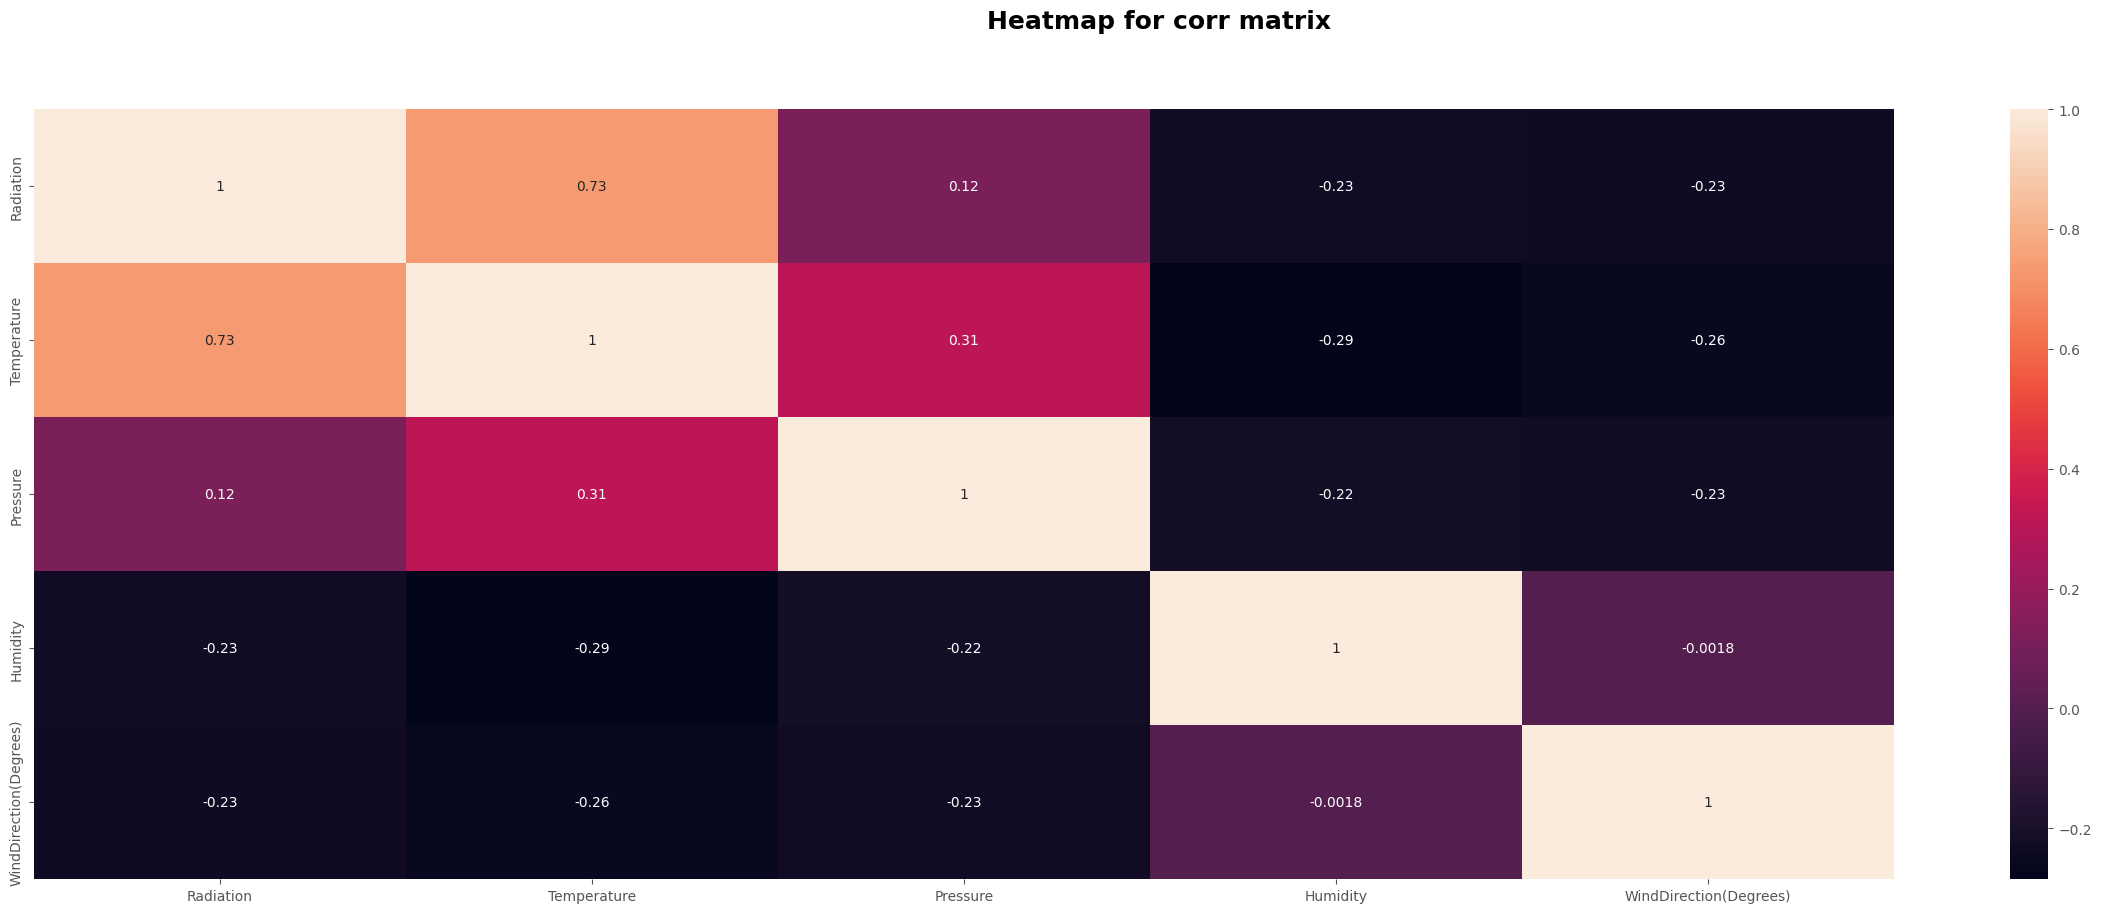

In [41]:
plt.figure(figsize=(30,10))
fig1 =sns.heatmap(SolarPrediction.corr()  , annot=True )
plt.suptitle('Heatmap for corr matrix', weight='bold', color = 'black').set_fontsize(18)
plt.savefig('fig1.jpg')
plt.show()

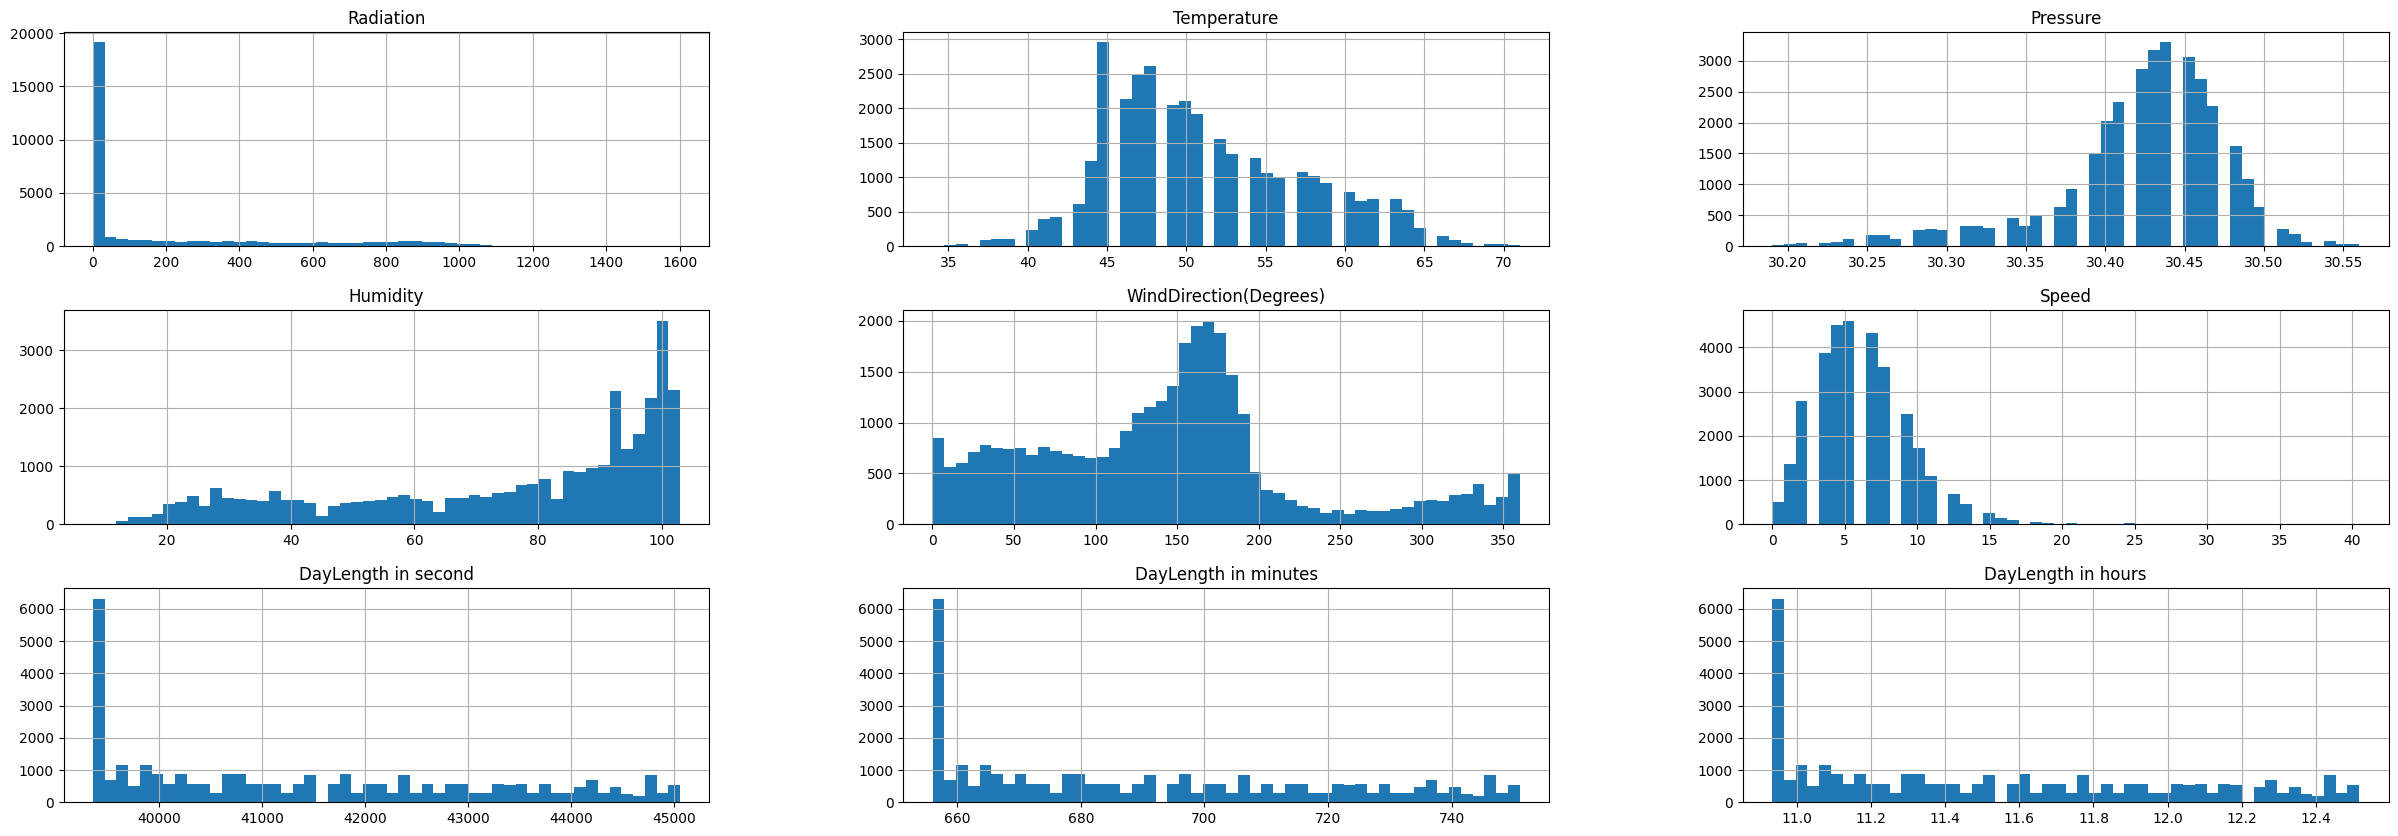

In [26]:
fig2 = SolarPrediction.hist(bins=50, figsize=(30,10))

plt.show()


In [25]:
SolarPrediction.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DayLength in second,DayLength in minutes,DayLength in hours
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,41433.032491,690.550542,11.509176
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1795.873502,29.931225,0.498854
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,39360.000000,656.000000,10.933333
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,39720.000000,662.000000,11.033333
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,41040.000000,684.000000,11.400000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,42900.000000,715.000000,11.916667
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,45060.000000,751.000000,12.516667


In [26]:
#another new cell
SolarPrediction['TimeOfDay'] = SolarPrediction.index.hour 

In [27]:
SolarPrediction['TimeOfDay']

UNIXTime
2016-09-01 10:00:08    10
2016-09-01 10:05:10    10
2016-09-01 10:20:06    10
2016-09-01 10:25:05    10
2016-09-01 10:30:09    10
                       ..
2017-01-01 09:35:02     9
2017-01-01 09:40:01     9
2017-01-01 09:45:04     9
2017-01-01 09:50:03     9
2017-01-01 09:55:01     9
Name: TimeOfDay, Length: 32686, dtype: int32

In [40]:
SolarPrediction.drop(columns= [ 'Speed' ] , inplace =True)


In [29]:
x= SolarPrediction.drop(columns= ['Radiation'])
y= SolarPrediction['Radiation']

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)


# Split the data 

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

# Creating the algorithms and Evaluating them


In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_prediction = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, lin_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, lin_prediction)

print(lin_rmse)
print(lin_r2)

177.41800320558397
0.6891037702916953


In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)



tree_prediction = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, tree_prediction)

print(tree_rmse)
print(tree_r2)

128.77743604568587
0.8362053813292145


In [34]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

forest_prediction = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_test, forest_prediction)
forest_rmse = np.sqrt(forest_mse)

forest_r2 = r2_score(y_test, forest_prediction)

print(forest_rmse)
print(forest_r2)


accuracy = forest_reg.score(x_test,y_test)
accuracy




94.77507588306216
0.9112826904607193


0.9112826904607193

In [35]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(x_train, y_train)

svr_prediction = svr_reg.predict(x_test)

svr_mse = mean_squared_error(y_test, svr_prediction)
svr_rmse = np.sqrt(svr_mse)

svr_r2 = r2_score(y_test, svr_prediction)

print(svr_rmse)
print(svr_r2)

156.05678648152144
0.7594610557032703


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_reg=GradientBoostingRegressor()
GBR_reg.fit(x_train, y_train)

GBR_prediction = GBR_reg.predict(x_test)

GBR_mse = mean_squared_error(y_test, GBR_prediction)
GBR_rmse = np.sqrt(GBR_mse)

GBR_r2 = r2_score(y_test, GBR_prediction)

print(GBR_rmse)
print(GBR_r2)

112.54647852314088
0.87489233949484


# Predictive system

In [ ]:

Temperature = float(input('Enter the Temperature:'))
Pressure = float(input('Enter the Pressure:'))
Humidity = float(input('Enter the Humidity:'))
WindDirection = float(input('Enter the WindDirection:'))

size_of_panal = float(input('Enter the size_of_panal(m^2):'))

time_H = int(input('Enter the number of hours:'))
time_M = int(input('Enter the number of minutes:'))
time_S = int(input('Enter the number of second:'))
 
time = (time_H*60*60)+(time_M*60)+time_S


input_data = (Temperature,Pressure,Humidity,WindDirection)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest_reg.predict(input_data_reshaped)


h2 = prediction * size_of_panal * time * 6.25 * 509
weight= (h2/ (6.022 * pow(10,23))/1.0078)

print(prediction)
print(weight)